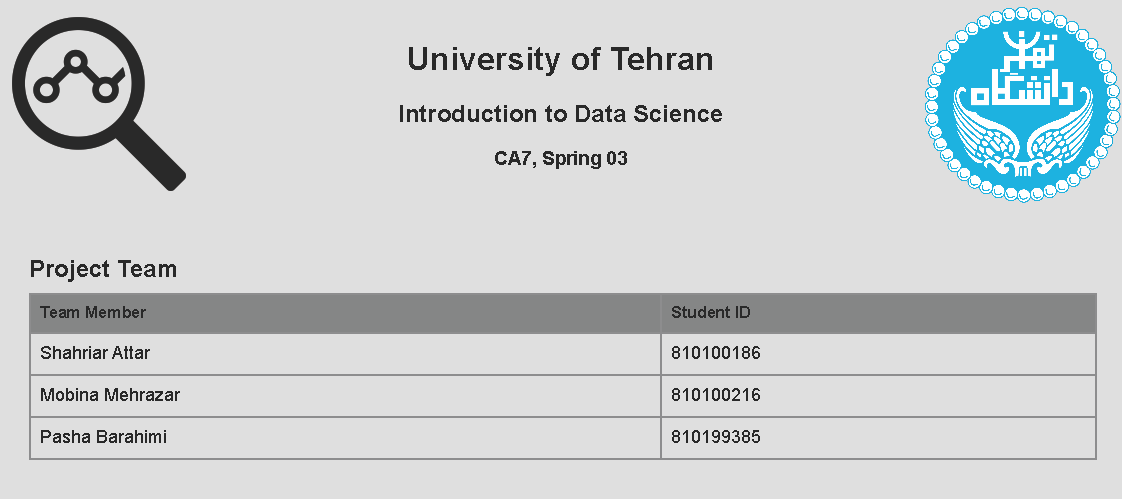

# Semi Supervised Learning and LLMs

## Table of Contents

- [Introduction](#introduction)
- [Objectives](#objectives)
- [Tasks](#tasks)
- [Dataset Description](#dataset-description)
- [Environment Setup](#environment-setup)
- [EDA](#eda)
- [Feature Engineering](#feature-engineering)
- [Semi Supervised](#semi-supervised)
  - [Traditional Methods (Label Propagation)](#traditional-methods-label-propagation)
  - [LLMs](#llms)
  - [Evaluation](#evaluation)
- [Questions](#questions)
- [References](#references)

## Introduction

We have been employed at Amazon as a data scientist for its movie analysis department. In this assignment, we are given a dataset and asked to train a model to classify IMDb review comments automatically. First, we need to use different methods to expand our labeled data for training, extract features from sentences, and then train and evaluate our model.

## Objectives

This assignment aims to:

- Implementing traditional semi-supervised learning methods.
- Using LLMs to classify IMDb review comments.

## Tasks

- Perform EDA on the Dataset
- Feature Engineering
- Label Propagation
- Using LLMs for Semi-Supervised Learning

## Dataset Description

In real-world scenarios, the majority of data remains unlabeled, and labeling all of it can be prohibitively expensive. Instead, we label a portion of the data and attempt to extend these labels to other samples, constituting a semi-supervised task.

We are given a dataset containing information about movies and their user reviews on Amazon's movie platform.

The dataset comprises movie reviews submitted by users on IMDb for sentiment analysis tasks. Sentiment in movie comments refers to the overall emotional tone or attitude expressed towards a movie in a comment or review, which could be positive or negative. Positive sentiment might indicate enjoyment, appreciation, or excitement about the movie, while negative sentiment could suggest disappointment, dislike, or criticism.

This dataset is provided in a structured JSONL format. Each entry usually contains:

- The text of a review.
- Its corresponding sentiment label (1 for positive, 0 for negative).
- A feature vector (embedding) for each comment, which is used to train machine-learning models.

The dataset segments are as follows:

- Training dataset: We'll use this portion of the data to train our models.
- Test dataset: We'll use this portion of the data for validation.
- Augmentation dataset: This unlabeled portion of the data should be labeled using existing models (machine learning models or large language models) to augment our training dataset.

## Environment Setup

Let's begin with setting up the Python environment and importing the necessary libraries.

In [ ]:
%pip install -U transformers
%pip install -U accelerate

In [1]:
import torch

from transformers import AutoTokenizer, AutoModelForCausalLM

In [3]:
MODEL_ARGS = {
    'Name': 'microsoft/Phi-3-mini-128k-instruct',
    'DType': torch.bfloat16,
}

TRAIN_DATASET_PATH = "../data/train_imdb.jsonl"
TEST_DATASET_PATH = "../data/test_imdb.jsonl"
AUGMENTATION_DATASET_PATH = "../data/aug_imdb_unlabeled.jsonl"

In [ ]:
def load_model(model_args: dict) -> tuple:
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model = AutoModelForCausalLM.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
        torch_dtype=model_args['DType'],
        low_cpu_mem_usage=True,
        device_map={"": device},
    )
    tokenizer = AutoTokenizer.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
    )

    return model, tokenizer

## EDA

Before we start building models, we need to take a close look at the data. This means examining information about movies and user reviews on Amazon. We want to understand what people are saying about the movies and what features they talk about the most. This helps us decide how to work with the data to build accurate models later on. We should also research how we can do EDA, on text data.

In [ ]:
# code

## Feature Engineering

We'll explore methods for extracting features from text data and provide a brief explanation of each. The TAs have already added these embedding features to each sentence in the dataset to simplify the complexity of NLP tasks, allowing us to focus on other aspects of our work. It's up to us how we want to use these features along the way.

In [ ]:
# code

## Semi Supervised

We have learned that supervised learning involves training a model on a labeled dataset, where each example is paired with an output label, while unsupervised learning deals with unlabeled data and aims to find hidden patterns or structures. Semi-supervised learning is a hybrid approach that combines both methods. It uses a small amount of labeled data along with a large amount of unlabeled data to improve learning accuracy. This approach leverages the labeled data to guide the learning process and the unlabeled data to capture the underlying data distribution, making it particularly useful when labeling data is expensive or time-consuming.

### Traditional Methods (Label Propagation)

We should research label propagation techniques and their traditional methods. We'll utilize one of these methods, such as KMeans, to propagate labels for unlabeled data. Next, we will train a model using the extracted features and propagate labels as desired (whether using only hand-labeled data or a combination of labeled and propagated labels is up to us).

In [ ]:
# code

### LLMs

For working with LLMs, the TAs suggest us look at the [documentation](https://huggingface.co/docs) on the Hugging Face website. Hugging Face is a leading platform for natural language processing, offering high-level libraries like [Transformers](https://huggingface.co/docs/transformers/index). The Transformers library provides pre-trained models and tools that simplify implementing and fine-tuning state-of-the-art language models for various NLP tasks, such as text classification, translation, and question-answering. This library makes it easy to leverage powerful models without needing deep expertise in machine learning, accelerating your development process. For more information, they suggest us check [this](https://huggingface.co/docs/transformers/llm_tutorial) tutorial on how to use LLMs.

Now, let's integrate an LLM (Large Language Model) for label generation. We should research how an LLM can be applied to a specific task like classification and explain the circumstances under which each method should be used.

We should also beware that using an LLM can be time consuming, so need to save our results. Just like the previous step, we'll train a model using the extracted features and new labeled dataset (we can even use the LLM as your classifier!).

For this task, we are going to use prompt engineering methods to generate labels with the [Phi-3](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct) model. The TAs have already implemented a function to load the model for us, so we don't need to worry about that.

In [ ]:
# code

### Evaluation

We'll evaluate both models on the test set and compare their results. For evaluation metrics, we can use the ones we have learned in class. To find the best model in each method, we'll need to explore different methods for labeling, models, datasets, features (including text features), and more.

In [ ]:
# code

## Questions

1. **Research semi-supervised problems and explain how to select a proportion of data for manual labeling. Does the choice of data matter?**

2. **For label propagation, how many data points did you label using your manually labeled data? Explain the trade-off between quality and quantity of your labeled data.**

3. **Research the limitations of label propagation methods. Can these limitations be overcome using a large language model (LLM)? If yes, explain how and why using LLMs is more effective for these tasks.**

4. **Research the history of language modeling, their evolution, and explain how they work. Discuss the advantages and limitations of language models, especially large language models (LLMs), in various tasks.**

5. **For each method (LLM/Label-Propagation), explain its advantages and disadvantages.**

6. **Certainly, you have worked with large language models (LLMs) since they were made public, and you might even be using one right now to help you with your assignment! How has your experience been while interacting with one of them? How do other LLMs differ from each other? Name some of these LLMs that you have worked with and share your opinion about them.**

## References

- [Hugging Face](https://huggingface.co/docs)
- [Transformers](https://huggingface.co/docs/transformers/index)
- [LLMs](https://huggingface.co/docs/transformers/llm_tutorial)
- [Phi-3](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)